In [15]:
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
%matplotlib inline
# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,10 mins 56 secs
H2O cluster version:,3.16.0.2
H2O cluster version age:,1 month and 9 days
H2O cluster name:,H2O_from_python_abbiepopa_t292e1
H2O cluster total nodes:,1
H2O cluster free memory:,6.970 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [2]:
d = h2o.import_file('../data/2016_subset_all_tables.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
d.shape

(6937, 16)

In [4]:
d.head()

id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,dcoilwtico,city,state,type,cluster,transactions,holitype
7.1279e+07,2016-02-22 00:00:00,6,1.46403e+06,3,False,BEVERAGES,1148,0,31.37,Quito,Pichincha,D,13,1630,No_Holiday
8.2078e+07,2016-06-14 00:00:00,6,1.9136e+06,1,False,PERSONAL CARE,4118,0,48.49,Quito,Pichincha,D,13,1603,No_Holiday
9.28523e+07,2016-10-04 00:00:00,6,881701,2,False,GROCERY I,1042,0,48.67,Quito,Pichincha,D,13,1605,No_Holiday
7.27136e+07,2016-03-08 00:00:00,6,1.15095e+06,2,False,BEVERAGES,1124,0,36.67,Quito,Pichincha,D,13,1732,No_Holiday
7.27143e+07,2016-03-08 00:00:00,6,1.89896e+06,5,False,BEVERAGES,1126,0,36.67,Quito,Pichincha,D,13,1732,No_Holiday
8.50331e+07,2016-07-15 00:00:00,6,1.47191e+06,4,False,PET SUPPLIES,6516,0,45.93,Quito,Pichincha,D,13,1785,No_Holiday
9.65588e+07,2016-11-11 00:00:00,6,841612,9,False,CLEANING,3038,0,43.39,Quito,Pichincha,D,13,1574,No_Holiday
9.64669e+07,2016-11-10 00:00:00,6,270522,1,False,AUTOMOTIVE,6806,0,44.62,Quito,Pichincha,D,13,1497,No_Holiday
7.21284e+07,2016-03-02 00:00:00,6,2.0104e+06,1,False,GROCERY I,1072,0,34.57,Quito,Pichincha,D,13,1817,No_Holiday
7.41329e+07,2016-03-23 00:00:00,6,1.95466e+06,16.636,True,PRODUCE,2008,1,38.28,Quito,Pichincha,D,13,1850,No_Holiday


In [5]:
#to start, lets go with on_promotion, transactions, and family since those were best last time
x = ['onpromotion', 'transactions', 'family']
y = 'unit_sales'

rf_fit1 = H2ORandomForestEstimator(model_id='rf_fit1', seed=1)
rf_fit1.train(x=x, y=y, training_frame = d)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [6]:
rf_fit1.model_performance()


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 323.13404382020303
RMSE: 17.975929567624675
MAE: 6.446356345737289
RMSLE: 0.8938706956256336
Mean Residual Deviance: 323.13404382020303


In [7]:
#granted, it's not really taking advantage of the random forest to only feed it three features
#but this is kinda a proof of concept!

In [8]:
test = h2o.import_file('../data/test_concatted.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
pred = rf_fit1.predict(test)

drf prediction progress: |████████████████████████████████████████████████| 100%


/anaconda/lib/python3.5/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'family' has levels not trained on: [HOME APPLIANCES]
  warnings.warn(w)


In [10]:
out = test[['id']].cbind(pred)

In [11]:
out.columns = ['id', 'unit_sales']

In [12]:
out_df = out.as_data_frame()

In [13]:
out_df.to_csv('../data/3f_rf_pred.csv', index = False)

In [14]:
test.head()

C1,id,store_nbr,onpromotion,family,transactions
0,1.25497e+08,1,False,GROCERY I,1523.84
1,1.27395e+08,1,False,DAIRY,1523.84
2,1.25708e+08,1,False,GROCERY I,1523.84
3,1.27605e+08,1,False,DAIRY,1523.84
4,1.25918e+08,1,False,GROCERY I,1523.84
5,1.27816e+08,1,False,DAIRY,1523.84
6,1.26129e+08,1,False,GROCERY I,1523.84
7,1.28027e+08,1,False,DAIRY,1523.84
8,1.2634e+08,1,False,GROCERY I,1523.84
9,1.28237e+08,1,False,DAIRY,1523.84


In [5]:
# Partition data into 70%, 15%, 15% chunks
# Setting a seed will guarantee reproducibility

splits = d.split_frame(ratios=[0.7, 0.15], seed=1)  

train = splits[0]
valid = splits[1]
test = splits[2]

In [9]:
#random forest with many more features!

y = 'unit_sales'
x = d.columns
x.remove(y)
x.remove('date')
x.remove('id')

In [10]:
print(y)
print(x)

unit_sales
['store_nbr', 'item_nbr', 'onpromotion', 'family', 'class', 'perishable', 'dcoilwtico', 'city', 'state', 'type', 'cluster', 'transactions', 'holitype']


In [11]:
rf_fit2 = H2ORandomForestEstimator(model_id='rf_fit2', seed=1)
rf_fit2.train(x=x, y=y, training_frame = train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [12]:
rf_fit2.model_performance(test)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 162.09955748874248
RMSE: 12.731832448188378
MAE: 6.96519715047453
RMSLE: 0.9484009594898246
Mean Residual Deviance: 162.09955748874248


In [13]:
rf_fit2.varimp()

[('transactions', 14382196.0, 1.0, 0.23959768071081483),
 ('dcoilwtico', 10919443.0, 0.7592333604687351, 0.18191055228658698),
 ('item_nbr', 8136660.5, 0.5657453493193946, 0.13555127356985672),
 ('family', 7610045.0, 0.5291295571274373, 0.12677821468327458),
 ('class', 5112136.0, 0.35544891753665436, 0.08516473625295207),
 ('cluster', 2456731.5, 0.17081755108886015, 0.040927489065592015),
 ('holitype', 2407381.25, 0.16738620791984757, 0.0401053472005737),
 ('store_nbr', 2021540.5, 0.1405585419639671, 0.033677500658660264),
 ('city', 1877656.0, 0.13055419353205866, 0.03128048197735212),
 ('onpromotion', 1666297.5, 0.11585835014346905, 0.027759391985356686),
 ('type', 1345028.125, 0.09352035843483152, 0.02240726098022972),
 ('perishable', 1339899.25, 0.09316374564774392, 0.022321817383531714),
 ('state', 751426.1875, 0.05224697170724137, 0.012518253245218594)]

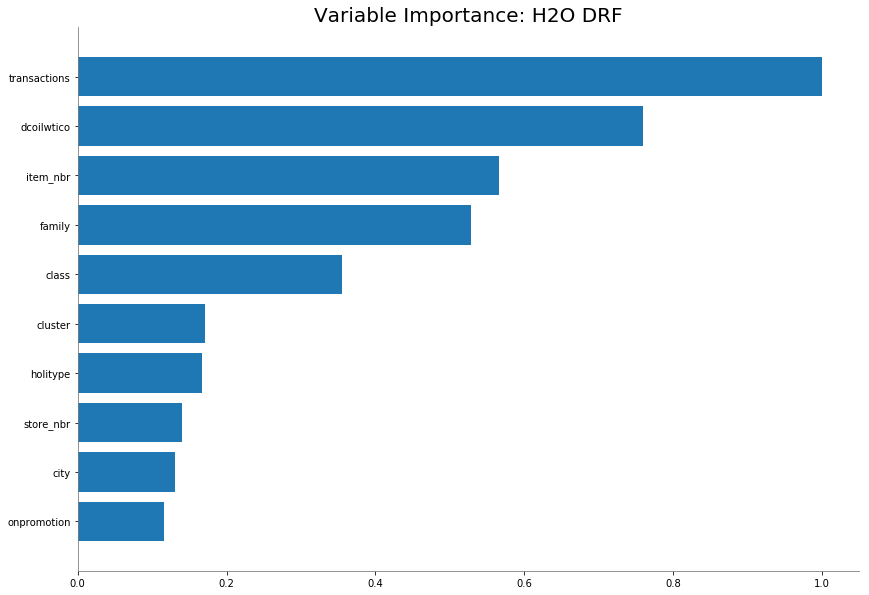

In [16]:
rf_fit2.varimp_plot()